In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from VibTesting import VibTesting

### Measurement

In [4]:
# dictionary of sensor serial numbers with lists of directions as values - option 2
""" sensor_list = {'34788':['/'], '4009':['z'], 'LW355978': ['z'], '371918':['z'], '177270':['z'],
               '371919':['z'], '371917':['z'], 'LW184270':['z'], '359598':['z']} """

" sensor_list = {'34788':['/'], '4009':['z'], 'LW355978': ['z'], '371918':['z'], '177270':['z'],\n               '371919':['z'], '371917':['z'], 'LW184270':['z'], '359598':['z']} "

In [5]:
sensor_list = ['34788', # force
               '4009', # 1
               'LW355978', # 2
               '371918', # 3
               '177270', # 4
               '371919', # 5
               '371917', # 6
               'LW184270', # 7
               '359598'] # 8 """

In [6]:
#sensor_list = ['34788', '']

In [7]:
# Vibrational testing class instance
imp_testing = VibTesting(task_name='My_task',
                            sensor_xlsx='Merilna oprema_updated.xlsx', sensor_list=sensor_list,
                           sampling_rate=51200, samps_per_chn=51200,
                           acquisition_time=1, no_impacts=10, trigger_level=5)

In [8]:
# VRSTNI RED KANALOV!
dir_dict = {0:'x', 1:'y', 2:'z'}
channels = [f'{i//3+1}{dir_dict[i%3]}' for i in range(24)]
chn_factors = [-1, 1, 1,  # 1
               1, -1, 1,  # 2
               -1, 1, 1,  # 3
               1, -1, 1,  # 4
               -1, 1, 1,  # 5
               1, -1, 1,  # 6
               -1, -1, 1,  # 7
               -1, -1, 1]  # 8

print('channels: ', channels, '\nchn_factors: ', chn_factors)

channels:  ['1x', '1y', '1z', '2x', '2y', '2z', '3x', '3y', '3z', '4x', '4y', '4z', '5x', '5y', '5z', '6x', '6y', '6z', '7x', '7y', '7z', '8x', '8y', '8z'] 
chn_factors:  [-1, 1, 1, 1, -1, 1, -1, 1, 1, 1, -1, 1, -1, 1, 1, 1, -1, 1, -1, -1, 1, -1, -1, 1]


In [9]:
impacts = [f'{i//3+1}{dir_dict[i%3]}_A' for i in range(24)] + [f'{i//3+1}{dir_dict[i%3]}_B' for i in range(24)]
imp_factors = [-1, -1, 1,  # 1A
               -1, 1, 1,  # 2A
               1, -1, 1,  # 3A
               -1, 1, 1,  # 4A
               1, -1, 1,  # 5A
               -1, 1, 1,  # 6A
               1, 1, 1,  # 7A
               1, 1, 1,  # 8A
               1, -1, -1,  # 1B
               1, 1, -1,  # 2B
               1, -1, -1,  # 3B
               1, 1, -1,  # 4B
               -1, -1, -1,  # 5B
               -1, 1, -1,  # 6B
               1, 1, -1,  # 7B
               1, 1, -1]  # 8B
print('impacts: ', impacts, '\nimp_factors: ', imp_factors)

impacts:  ['1x_A', '1y_A', '1z_A', '2x_A', '2y_A', '2z_A', '3x_A', '3y_A', '3z_A', '4x_A', '4y_A', '4z_A', '5x_A', '5y_A', '5z_A', '6x_A', '6y_A', '6z_A', '7x_A', '7y_A', '7z_A', '8x_A', '8y_A', '8z_A', '1x_B', '1y_B', '1z_B', '2x_B', '2y_B', '2z_B', '3x_B', '3y_B', '3z_B', '4x_B', '4y_B', '4z_B', '5x_B', '5y_B', '5z_B', '6x_B', '6y_B', '6z_B', '7x_B', '7y_B', '7z_B', '8x_B', '8y_B', '8z_B'] 
imp_factors:  [-1, -1, 1, -1, 1, 1, 1, -1, 1, -1, 1, 1, 1, -1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, 1, 1, -1, 1, -1, -1, 1, 1, -1, -1, -1, -1, -1, 1, -1, 1, 1, -1, 1, 1, -1]


Measurement point 8z_B


  0%|          | 0/10 [00:00<?, ?it/s]

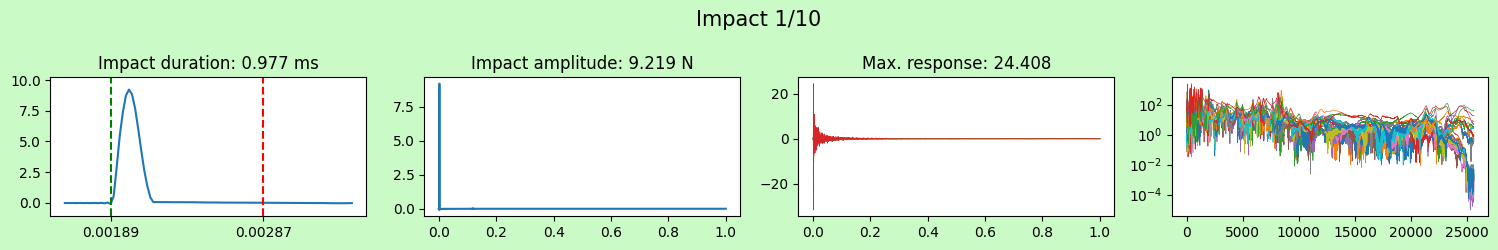

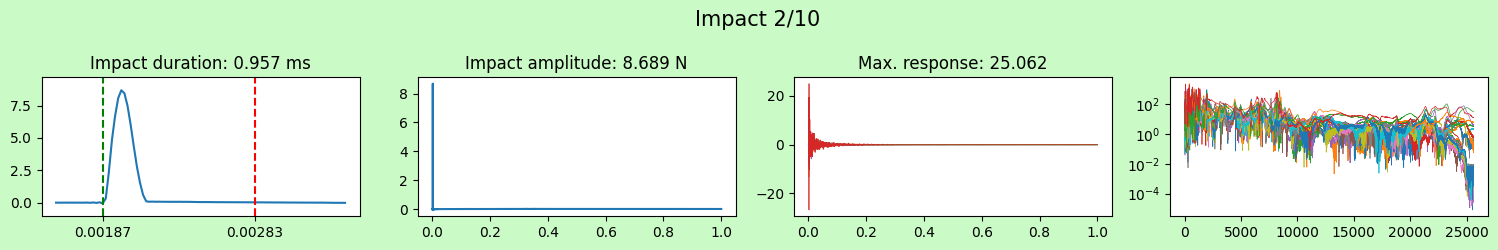

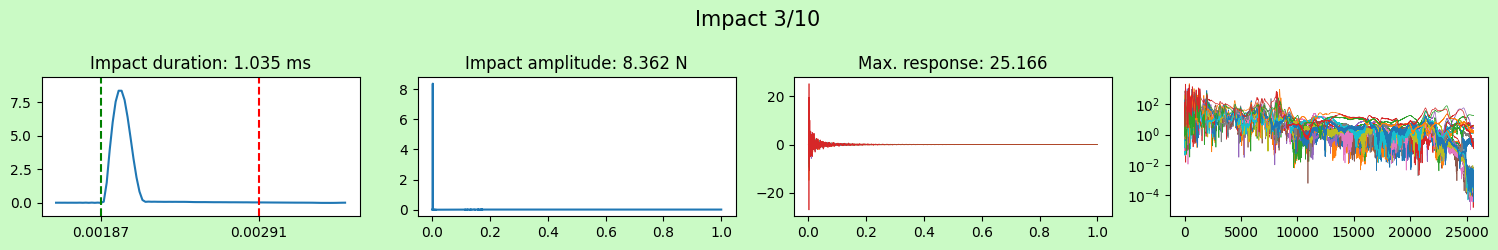

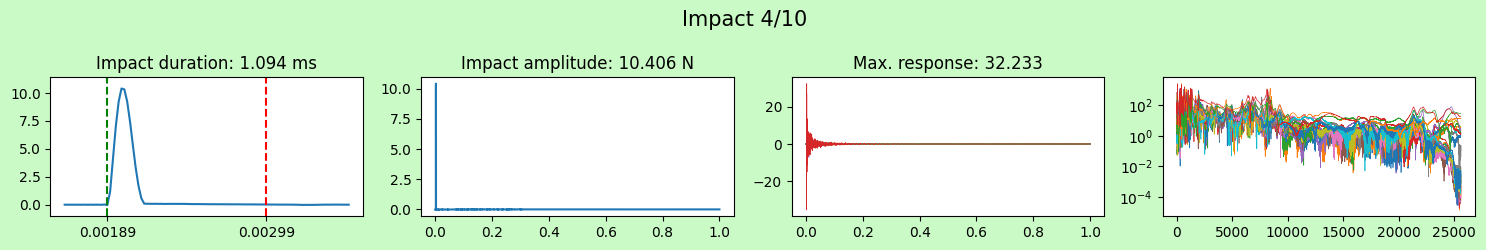

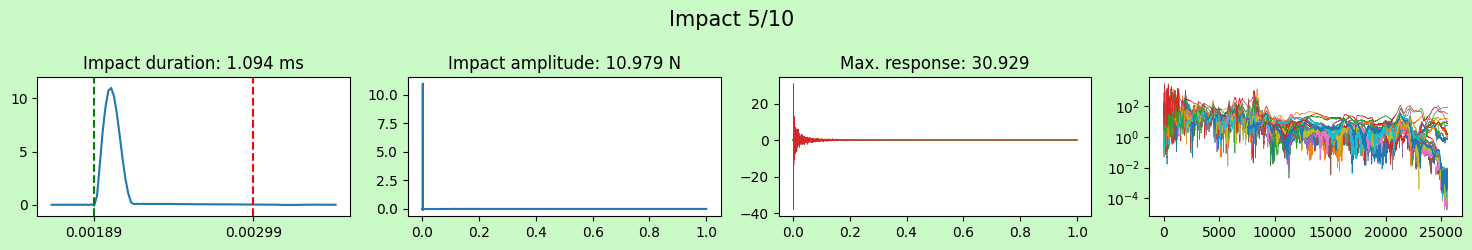

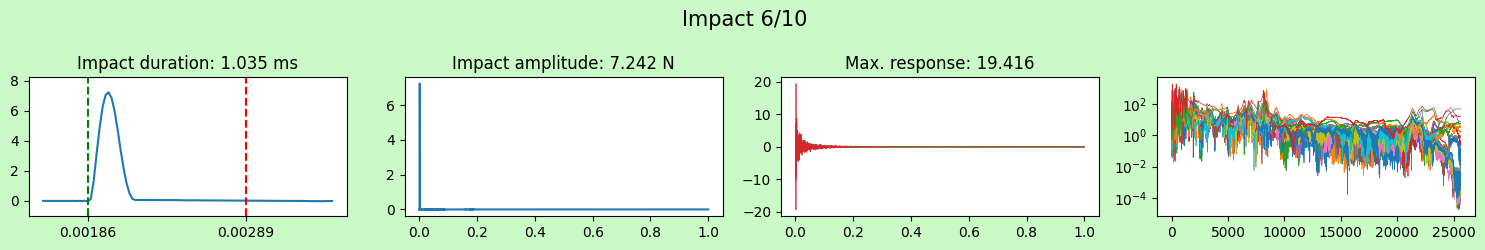

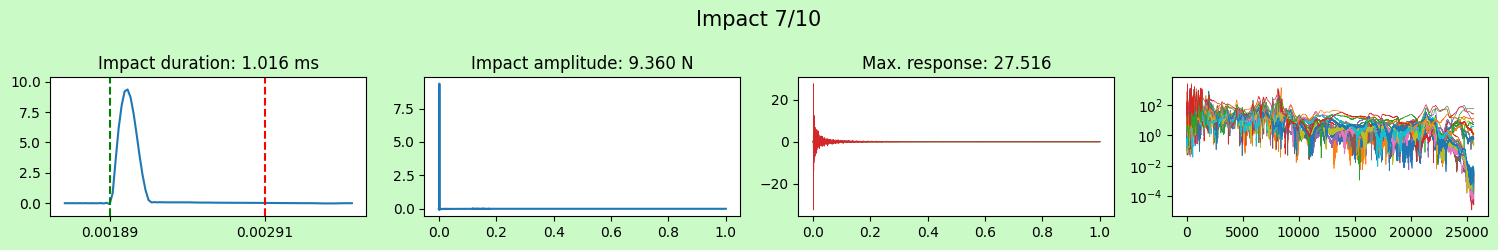

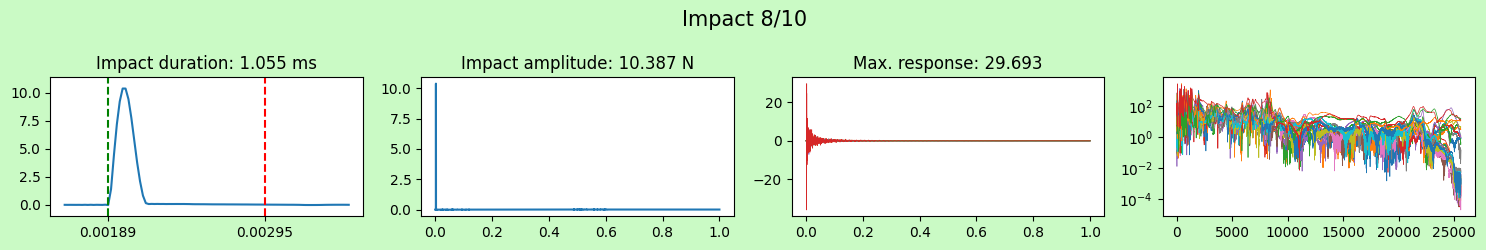

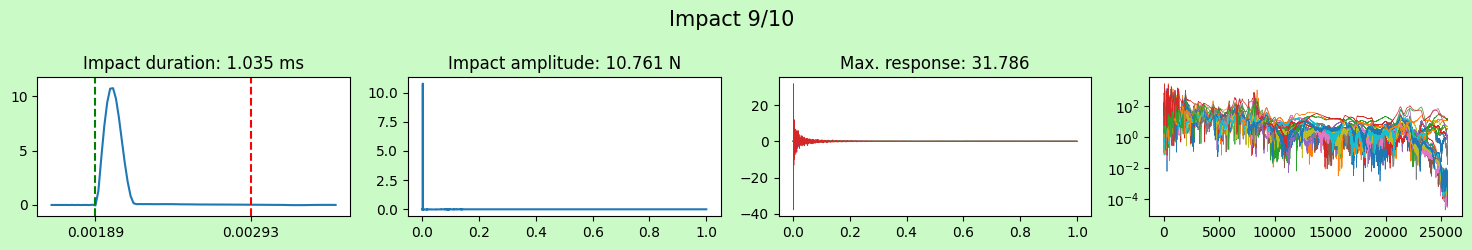

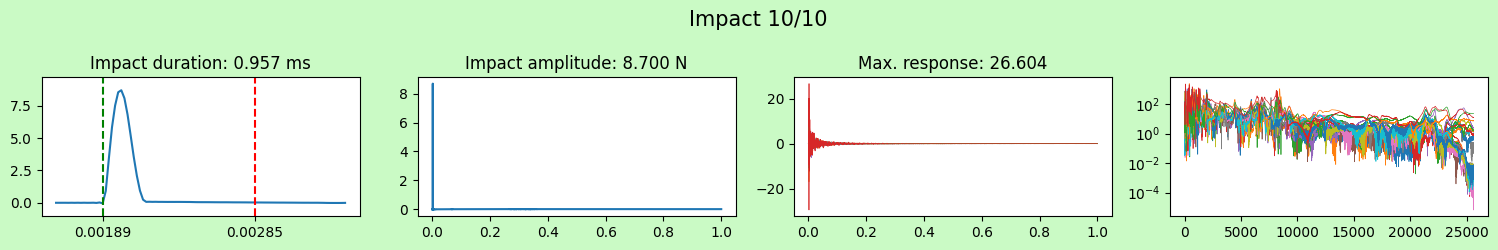

GridspecLayout(children=(SelectMultiple(index=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9), layout=Layout(grid_area='widget0…

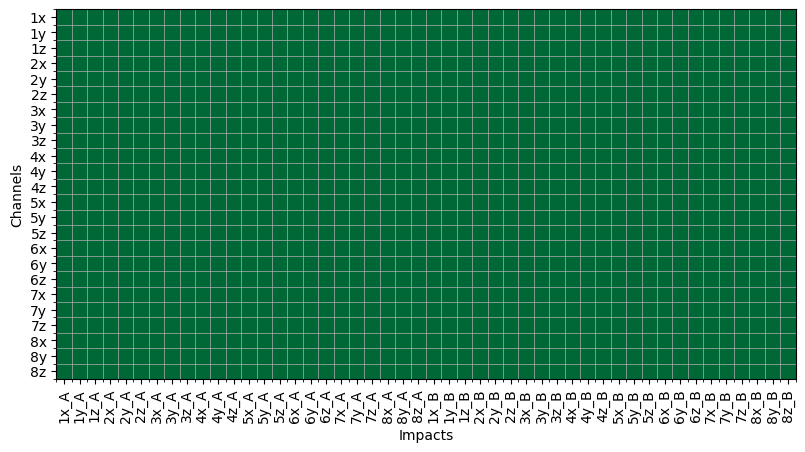

Output()

In [ ]:
# VRSTNI RED KANALOV!
meas_dir = #r"C:\Users\timvr\OneDrive - Univerza v Ljubljani\Documents\Doktorat\Projekt_2\karakterizacija_kovic\Meritve\Meritve_5\ARB_B_8Nm_alt"#r"C:\Users\timvr\OneDrive - Univerza v Ljubljani\Documents\Doktorat\Projekt_2\karakterizacija_kovic\Meritve\Meritve_5\10Nm\ARB_konf_B"
imp_testing.start_admittance_measurement(channels, impacts, chn_factors, imp_factors, save_to=meas_dir,
                                         existing_Y=meas_dir + r'\Y.npy', existing_json=meas_dir + r'\dof_data.json')
# save_to arument is optional (file name can be chosen later)

In [72]:
imp_factors[imp_testing.adm_impacts.index(imp_testing.points_to_measure[imp_testing.point_ind])]

-1

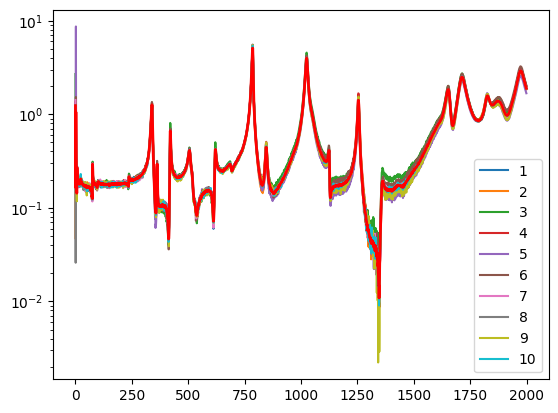

In [73]:
chn_ = 16
data_ = imp_testing.measurement_array # np.load(meas_dir + '/7y_A.npy')#
ffts_ = np.fft.rfft(data_)
f_ = ffts_[:,0,:]
a_ = ffts_[:,1:, :]
frfs_ = np.einsum('ik,ijk->ijk', 1/f_, a_)
plt.semilogy(abs(frfs_[:,chn_,:2000].T), label=np.arange(10)+1)
plt.semilogy(abs(np.sum(a_[:,chn_,:], axis=0)/np.sum(f_, axis=0))[:2000], color='r', lw=2)
plt.legend()

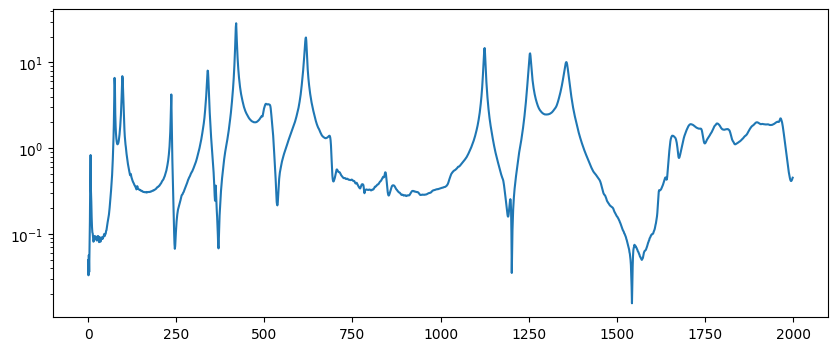

In [62]:
lf = [82, 200, 328, 367]
i,j = 5, 23
plt.figure(figsize=(10,4))
plt.semilogy(abs(imp_testing.Y[:2000, i, j]))
#plt.semilogy(abs(np.load(meas_dir + '/Y_A_alt.npy')[:2000, i, j]), ls='--')
#plt.plot(abs(imp_testing.Y[:1000, 5, 11]))
#plt.legend()
#plt.vlines(lf, 1e-2, 1e2, color='r')

In [ ]:
i,j = 5, 23
Y_loaded = np.load(meas_dir + '/../ARB_A_8Nm_alt/Y_ARB_A_alt.npy')
for i in range(24):
    plt.figure(figsize=(10,4))
    plt.semilogy(abs(Y_loaded[:2000, i, j]))